In [33]:
import sys
sys.path.append('c:\\Users\\Admin\\few_shot_learning\\')

from Utils.Class import Predictor, FSL, Random, Nearest_Neighbour
from Utils.saveLoad import save_data, load_data
from Utils import preprocess, testModels, buildModel, utils

import numpy as np
import os
import random

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

import keras
import tensorflow as tf

from keras.models import load_model, save_model

from keras.callbacks import History 

from keras.optimizers import Adam
from keras import backend as K

In [34]:
kwargs = {'train_pairs' : True,
          'train_labels' : True,
        #   'X_test' : True,
        #   'Y_test' : True,
          'val_pairs' : True,
          'val_labels' : True}

data = load_data(path="D://", **kwargs)
train_labels = data['train_labels']
val_labels = data['val_labels']

train_pairs loaded from /D://train_pairs.h5!
train_labels loaded from /D://train_labels.h5!
val_pairs loaded from /D://val_pairs.h5!
val_labels loaded from /D://val_labels.h5!


In [35]:
model = buildModel.get_pretrained_model(input_shape=(200, 280, 3), num_dense=2, dense_size=(1024,512))
model.summary()

input_9 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
vgg16 True
module_wrapper_2 True
dense_6 True
dropout_4 True
dense_7 True
dropout_5 True
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 200, 280, 3) 0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 200, 280, 3) 0                                            
____________________________________________________

In [23]:
model.load_weights('models/vgg16_aircraft_batch_5/weights')

In [36]:
val_inputs = [data['val_pairs'][:,0], data['val_pairs'][:,1]]
train_inputs = [data['train_pairs'][:,0], data['train_pairs'][:,1]]

In [37]:
del data
import gc
gc.collect()

10522

In [38]:
optimizer = Adam(learning_rate = 1e-5)#, clipnorm=1e-1)
model.compile(loss = "binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
hist = History()
early_stop = buildModel.EarlyStoppingAtMinLoss(patience=5, val_inputs=val_inputs, val_labels=val_labels)

In [39]:
model.optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-05>

In [40]:
model.fit(train_inputs, train_labels, batch_size=5, epochs=9, callbacks=[early_stop, hist])

Epoch 1/20
6200/6200 [==============================] - 604s 97ms/step - loss: 0.6202 - accuracy: 0.6484

Evaluating model on validations set
375/375 [==============================] - 51s 133ms/step - loss: 0.6226 - accuracy: 0.7167
Epoch 2/20



  15/6200 [..............................] - ETA: 10:06 - loss: 0.4096 - accuracy: 0.8489

KeyboardInterrupt: 

batch_100 called back at 18 epochs
batch_10 interrupt after 13 epochs
batch_5_dropout_0.5 22 epochs

In [12]:
print(hist.history)

{'loss': [0.4506925344467163, 0.3159433901309967, 0.2552785873413086, 0.210983008146286, 0.18045039474964142, 0.15660540759563446, 0.1381586492061615, 0.12351984530687332, 0.11087790131568909], 'accuracy': [0.7824516296386719, 0.8849677443504333, 0.9265483617782593, 0.9575806260108948, 0.976677417755127, 0.9873548150062561, 0.9919999837875366, 0.9959032535552979, 0.9976451396942139], 'val_loss': [0.519981861114502, 0.5500832796096802, 0.505403995513916, 0.5149338245391846, 0.5202074646949768, 0.48656320571899414, 0.5245591402053833, 0.49940890073776245, 0.4725710153579712], 'val_acc': [0.7276666760444641, 0.7023333311080933, 0.7480000257492065, 0.7378333210945129, 0.7351666688919067, 0.7621666789054871, 0.7366666793823242, 0.7568333148956299, 0.7713333368301392]}


In [31]:
with open('plots/LC_vgg16_aircraft_batch_5_max_norm_2.txt', 'r') as f:
    contents = f.read()
    hist_dict = eval(contents)
for k, v in hist.history.items():
    hist_dict[k] = (hist_dict[k][:] + hist.history[k])
with open('plots/LC_vgg16_aircraft_batch_5_max_norm_2.txt', 'w') as f:
    f.write(str(hist_dict)) 
# with open('plots/LC_vgg16_aircraft_batch_5_max_norm_2.txt', 'w') as f:
#     f.write(str(hist.history)) 


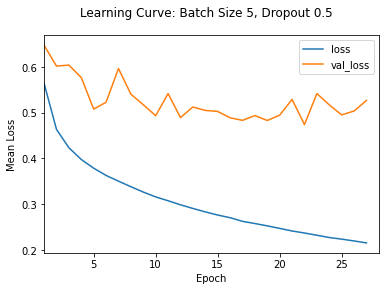

In [32]:
X = range(1, len(hist_dict['loss']) + 1)
for k, v in hist_dict.items():
    if 'loss' in k:
        plt.plot(X, v, label=k)

plt.xlabel('Epoch')
plt.xticks(range(0, len(hist_dict['loss']) + 1, 5))
plt.xlim(X[0], X[-1]+1)

plt.ylabel('Mean Loss')
plt.legend()
plt.suptitle('Learning Curve: Batch Size {}, Dropout {} Max_norm({})'.format(5, 0.5, 2))
plt.savefig('plots/LC_vgg16_aircraft_batch_5_max_norm_2.pdf')
plt.show()
    

In [10]:
model.evaluate(val_inputs, val_labels)

188/188 [==============================] - 60s 259ms/step - loss: 0.4958 - accuracy: 0.7645


[0.49581798911094666, 0.7645000219345093]

In [9]:
model.save_weights('models/vgg16_aircraft_batch_5/weights')

Evaluating models on 5 random 2 way 1 shot learning tasks ... 

TEST 1
vgg16_aircraft GUESSED PAIR 2
CORRECT


TEST 2
vgg16_aircraft GUESSED PAIR 2
CORRECT


TEST 3
vgg16_aircraft GUESSED PAIR 2
CORRECT


TEST 4
vgg16_aircraft GUESSED PAIR 2
CORRECT


TEST 5
vgg16_aircraft GUESSED PAIR 1
INCORRECT


vgg16_aircraft Model achieved 80.0% accuracy on 5 2-way 1-shot tests


{'vgg16_aircraft': 80.0}

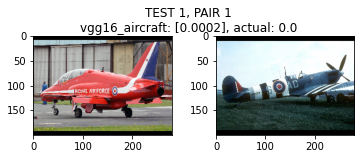

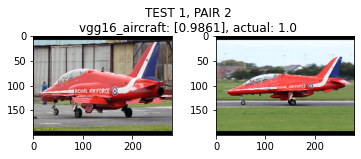

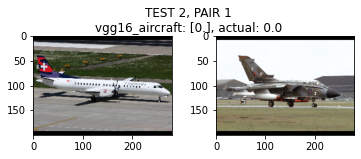

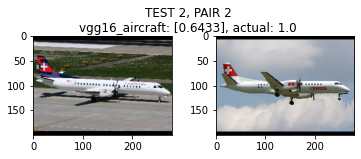

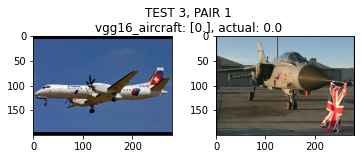

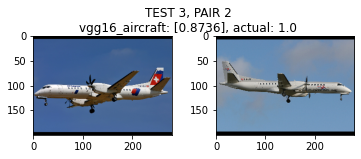

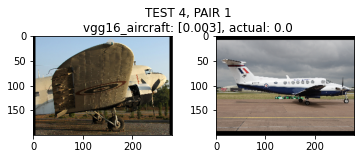

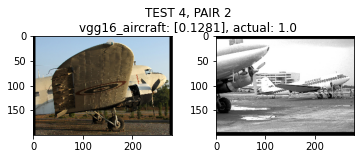

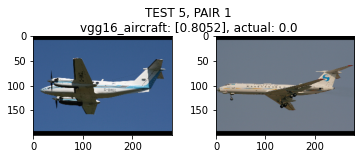

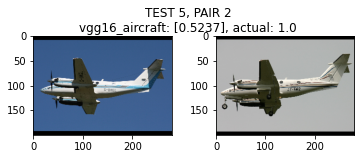

In [20]:
 testModels.test_models(models, data['X_test'], data['Y_test'], num_tests=5, N=2, K=1, verbose = 1)

In [16]:
models = [FSL(model, name='vgg16_aircraft')]

In [18]:
N = range(1,10)
NUM_TEST = 100
testModels.get_accuracy(models, data['X_test'], data['Y_test'], N, NUM_TEST)

vgg16_aircraft Model achieved 67.0% accuracy on 100 2-way 1-shot tests
vgg16_aircraft Model achieved 46.0% accuracy on 100 3-way 1-shot tests
vgg16_aircraft Model achieved 38.0% accuracy on 100 4-way 1-shot tests
vgg16_aircraft Model achieved 36.0% accuracy on 100 5-way 1-shot tests
vgg16_aircraft Model achieved 41.0% accuracy on 100 6-way 1-shot tests
vgg16_aircraft Model achieved 26.0% accuracy on 100 7-way 1-shot tests
vgg16_aircraft Model achieved 29.0% accuracy on 100 8-way 1-shot tests
vgg16_aircraft Model achieved 18.0% accuracy on 100 9-way 1-shot tests


{'vgg16_aircraft': [100, 67.0, 46.0, 38.0, 36.0, 41.0, 26.0, 29.0, 18.0],
 'range_': range(1, 10)}

In [15]:
model.evaluate(val_inputs, data['val_labels'])

299/299 [==============================] - 76s 256ms/step - loss: 0.2613 - accuracy: 0.9136


[0.2613235414028168, 0.9136268496513367]

In [26]:
num_pairs = 1000
X = np.array([])
Y = np.array([])
for i in range(num_pairs):
    support_set, targets = testModels.get_test(data['X_test'], data['Y_test'], 2, 1)
    if len(X) == 0:
        X = support_set
    else:
         X = np.vstack((X, support_set))

    if len(Y) == 0:
        Y = targets
    else:
        Y = np.append(Y, targets)

print(X.shape, Y.shape)

(2000, 2, 200, 280, 3) (2000,)
